# Identify how fast OS packages respond to security vulnerabilities - Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Read in full report data 

In [2]:
full_data_path = "../deliverable1/outputs/clair_reports.csv"
full_data = pd.read_csv(full_data_path, index_col = 0)

In [3]:
full_data.head(20)

,Package,Vulnerability,OS,Package_Version
index,,,,
0,tar,CVE-2018-20482,alpine:v3.6,1.31-r0
1,tar,CVE-2016-6321,alpine:v3.6,1.29-r1
2,tar,CVE-2016-6321,alpine:v3.7,1.29-r1
3,tar,CVE-2018-20482,alpine:v3.7,1.31-r0
4,tar,CVE-2016-6321,alpine:v3.8,1.29-r1
5,tar,CVE-2018-20482,alpine:v3.8,1.31-r0
6,tar,CVE-2016-6321,alpine:v3.4,1.29-r1
7,tar,CVE-2018-20482,alpine:v3.10,1.31-r0
8,tar,CVE-2016-6321,alpine:v3.10,1.29-r1


## Distribution of packages in the full data

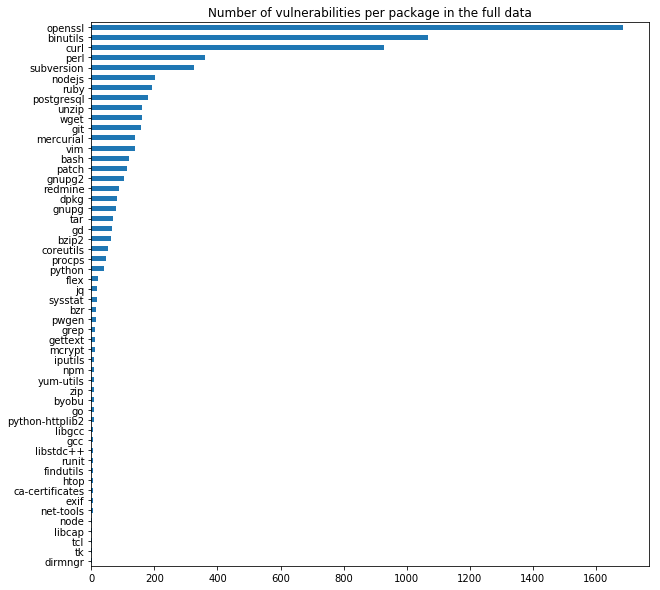

In [4]:
plt.figure(figsize=(10,10))
full_data.Package.value_counts()[::-1].plot('barh', 
                                             title="Number of vulnerabilities per package in the full data")
plt.savefig("outputs/Number_of_vulnerabilities_per_package_in_the_full_data.png")

plt.show()

## Full data contained duplicate vulnerabilities 

In [5]:
full_data['OS_base_name'] = full_data.apply(lambda row: row['OS'].split(":")[0], axis=1)

In [6]:
full_data[full_data[['Package', 'Vulnerability', 'OS_base_name', 'Package_Version']].duplicated()].head(20)

,Package,Vulnerability,OS,Package_Version,OS_base_name
index,,,,,
2,tar,CVE-2016-6321,alpine:v3.7,1.29-r1,alpine
3,tar,CVE-2018-20482,alpine:v3.7,1.31-r0,alpine
4,tar,CVE-2016-6321,alpine:v3.8,1.29-r1,alpine
5,tar,CVE-2018-20482,alpine:v3.8,1.31-r0,alpine
6,tar,CVE-2016-6321,alpine:v3.4,1.29-r1,alpine
7,tar,CVE-2018-20482,alpine:v3.10,1.31-r0,alpine
8,tar,CVE-2016-6321,alpine:v3.10,1.29-r1,alpine
9,tar,CVE-2018-20482,alpine:v3.9,1.31-r0,alpine
10,tar,CVE-2016-6321,alpine:v3.9,1.29-r1,alpine


## Reading the de-duplicated data 

In [7]:
data = full_data[~full_data[['Package', 'Vulnerability', 'Package_Version', 'OS_base_name']].duplicated()]

In [8]:
data.shape

(3604, 5)

In [9]:
data.OS_base_name.value_counts()

debian    1324
ubuntu    1301
alpine     442
oracle     272
centos     265
Name: OS_base_name, dtype: int64

In [12]:
data_path = "../deliverable1/outputs/vulnerability_timestamps.csv"
data.to_csv(data_path)

In [13]:
data = pd.read_csv(data_path)
columns = ['Package', 'Vulnerability', 'OS', 'Package_Version', 'OS_base_name', 
           'Date_Reported', 'Date_Fixed', 'Days_For_Fix']
data = data[columns]

In [16]:
data.head(7)

,Package,Vulnerability,OS,Package_Version,OS_base_name,Date_Reported,Date_Fixed,Days_For_Fix
0,tar,CVE-2018-20482,alpine:v3.6,1.31-r0,alpine,2018-12-26,NaN,NaN
1,tar,CVE-2016-6321,alpine:v3.6,1.29-r1,alpine,2016-10-27,NaN,NaN
2,tar,CVE-2019-9923,debian:8,#MAXV#,debian,2019-01-02,NaN,NaN
3,tar,CVE-2018-20482,debian:8,1.27.1-2+deb8u2,debian,2018-12-26,NaN,NaN
4,tar,CVE-2007-4131,debian:8,1.18-2,debian,2007-08-13,NaN,NaN
5,tar,CVE-2007-4476,debian:8,1.18-1,debian,2007-08-13,NaN,NaN
6,tar,CVE-2010-0624,debian:8,1.23-1,debian,2005-12-23,2011-09-13,2090.0


Our script is able to get dates when a vulnerability is reported using the XForce API. We scrape data for the date when a vulnerability is fixed. 

In [17]:
data.shape

(3604, 8)

There are 54 packages to be tracked

In [18]:
len(data.Package.unique())

54

Some of the packages can be seen here:

In [19]:
data.Package.unique()

array(['tar', 'redmine', 'python', 'yum-utils', 'vim', 'perl',
       'coreutils', 'nodejs', 'zip', 'libcap', 'tcl', 'subversion',
       'byobu', 'dpkg', 'libstdc++', 'unzip', 'npm', 'openssl', 'node',
       'gnupg2', 'ca-certificates', 'python-httplib2', 'git', 'binutils',
       'procps', 'iputils', 'jq', 'gcc', 'htop', 'wget', 'gnupg',
       'mcrypt', 'gd', 'postgresql', 'pwgen', 'gettext', 'findutils',
       'patch', 'bzip2', 'flex', 'dirmngr', 'go', 'ruby', 'exif',
       'net-tools', 'curl', 'grep', 'libgcc', 'bzr', 'runit', 'mercurial',
       'sysstat', 'bash', 'tk'], dtype=object)

In [20]:
data[~data['Days_For_Fix'].isnull()].tail(20).reset_index(drop=True)

,Package,Vulnerability,OS,Package_Version,OS_base_name,Date_Reported,Date_Fixed,Days_For_Fix
0,bash,CVE-2016-7543,debian:10,4.4-1,debian,2016-09-16,2016-11-21,66.0
1,bash,CVE-2017-5932,debian:10,4.4-3,debian,2017-02-07,2017-01-25,13.0
2,bash,CVE-2016-9401,debian:10,4.4-3,debian,2016-11-17,2017-01-25,69.0
3,bash,CVE-2014-6277,ubuntu:12.04,4.2-2ubuntu2.6,ubuntu,2014-09-27,2014-10-09,12.0
4,bash,CVE-2014-6278,ubuntu:12.04,4.2-2ubuntu2.6,ubuntu,2014-09-27,2014-10-09,12.0
5,bash,CVE-2016-0634,ubuntu:16.10,4.3-15ubuntu1.1,ubuntu,2016-09-16,2018-01-23,494.0
6,bash,CVE-2016-9401,ubuntu:16.10,4.3-15ubuntu1.1,ubuntu,2016-11-17,2018-01-23,432.0
7,bash,CVE-2016-7543,ubuntu:16.10,4.3-15ubuntu1.1,ubuntu,2016-09-16,2018-01-23,494.0
8,bash,CVE-2016-9401,ubuntu:14.04,4.3-7ubuntu1.7,ubuntu,2016-11-17,2017-05-17,181.0
9,bash,CVE-2016-7543,ubuntu:14.04,4.3-7ubuntu1.7,ubuntu,2016-09-16,2017-05-17,243.0


## Distribution of Packages in the cleaned data

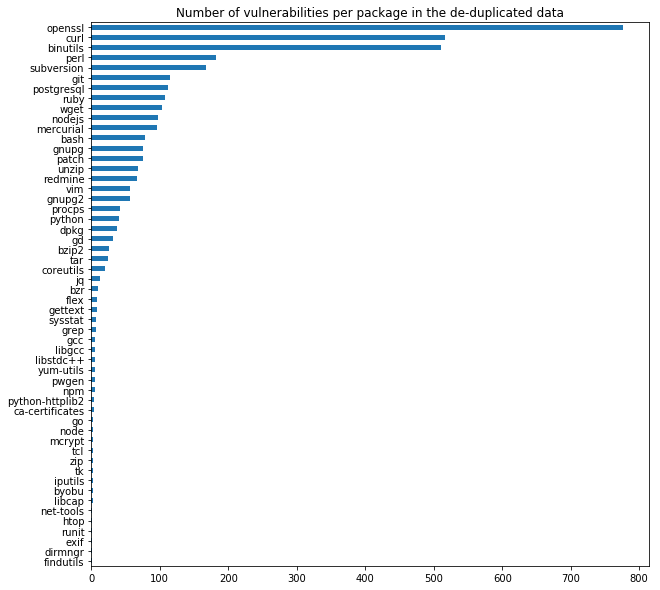

In [21]:
plt.figure(figsize=(10,10))
data.Package.value_counts()[::-1].plot('barh',
                                       title="Number of vulnerabilities per package in the de-duplicated data")
plt.savefig("outputs/Number_of_vulnerabilities_per_package_in_the_dedup_data.png")

plt.show()

## Distribution of OS in the cleaned data

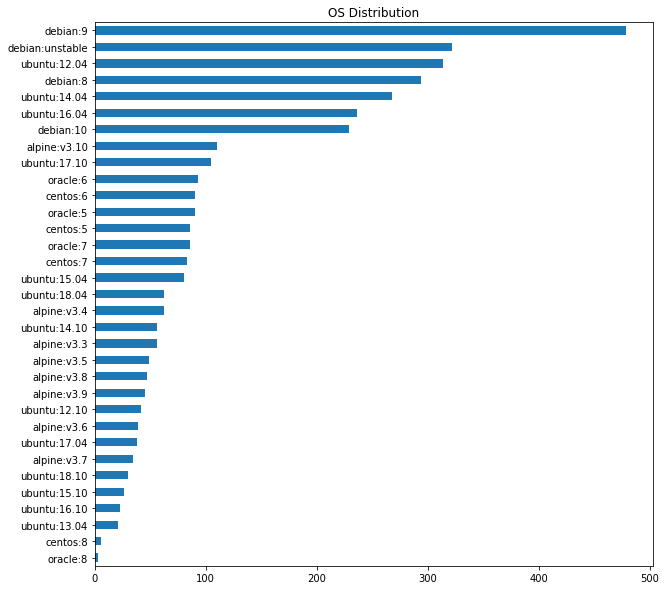

In [22]:
plt.figure(figsize=(10,10))
data.OS.value_counts()[::-1].plot('barh', 
                             title="OS Distribution")
plt.savefig("outputs/OS_Distribution")

plt.show()

In [23]:
data['OS_base_name'].value_counts('norm')

debian    0.367370
ubuntu    0.360988
alpine    0.122642
oracle    0.075472
centos    0.073529
Name: OS_base_name, dtype: float64

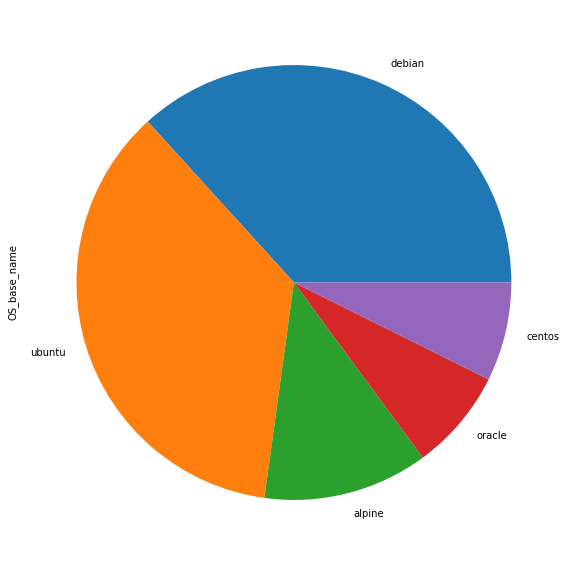

In [24]:
plt.figure(figsize=(10,10))
data['OS_base_name'].value_counts('norm').plot('pie')

## Analyzing how long it takes for vulnerabilities to be fixed

In [25]:
day_fixed_df = data[~data['Days_For_Fix'].isnull()]
day_fixed_df.shape

(803, 8)

In [26]:
day_fixed_df.sort_values('Days_For_Fix', ascending=False, inplace=True)

In [27]:
day_fixed_df.head()

,Package,Vulnerability,OS,Package_Version,OS_base_name,Date_Reported,Date_Fixed,Days_For_Fix
2496,mcrypt,CVE-2012-4527,debian:unstable,2.6.8-1.3,debian,2012-10-18,2018-12-12,2246.0
6,tar,CVE-2010-0624,debian:8,1.23-1,debian,2005-12-23,2011-09-13,2090.0
3539,bash,CVE-2012-6711,debian:8,4.3-1,debian,2019-06-17,2014-03-05,1930.0
724,unzip,CVE-2018-18384,debian:10,6.0-11,debian,2018-10-16,2014-04-30,1630.0
2720,patch,CVE-2010-4651,ubuntu:12.04,2.6.1-3ubuntu0.1,ubuntu,2011-02-18,2015-06-22,1585.0


## Debian and Ubuntu are the Operating systems we analyzed

In [28]:
data['OS_base_name'].unique()

array(['alpine', 'debian', 'ubuntu', 'oracle', 'centos'], dtype=object)

In [29]:
data.groupby('OS_base_name').sum().sort_values('Days_For_Fix', ascending=False)

,Days_For_Fix
OS_base_name,
ubuntu,107857.0
debian,88232.0
alpine,0.0
centos,0.0
oracle,0.0


<Figure size 720x720 with 0 Axes>

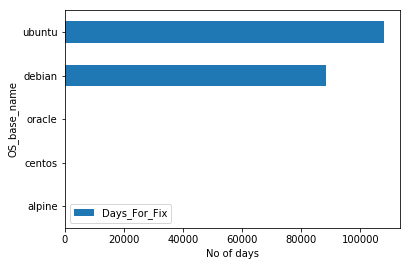

In [30]:
plt.figure(figsize=(10,10))
ax = data.groupby('OS_base_name').sum().sort_values('Days_For_Fix', ascending=True).plot(kind='barh')
ax.set(xlabel = 'No of days')
plt.show()

## Histograms to demonstrate how much time it takes for a fix

In [36]:
day_fixed_df['Days_For_Fix'][day_fixed_df['OS_base_name']=='debian']

2496    2246.0
6       2090.0
3539    1930.0
724     1630.0
384     1584.0
729     1570.0
389     1299.0
2741     994.0
747      942.0
1626     921.0
744      916.0
782      900.0
734      846.0
927      838.0
730      807.0
172      791.0
2643     748.0
2644     748.0
3540     723.0
2337     691.0
2449     640.0
2441     640.0
3469     639.0
559      589.0
558      589.0
561      570.0
2028     560.0
682      559.0
2061     540.0
1959     540.0
         ...  
3528      10.0
3122      10.0
3108      10.0
3538      10.0
2437       9.0
735        9.0
3537       9.0
3536       9.0
727        9.0
224        9.0
230        9.0
274        9.0
2879       8.0
524        6.0
225        6.0
239        6.0
847        5.0
878        5.0
895        5.0
922        5.0
963        5.0
3532       3.0
2669       2.0
3438       2.0
3440       2.0
1055       1.0
2992       1.0
1049       1.0
3021       1.0
2668       0.0
Name: Days_For_Fix, Length: 421, dtype: float64

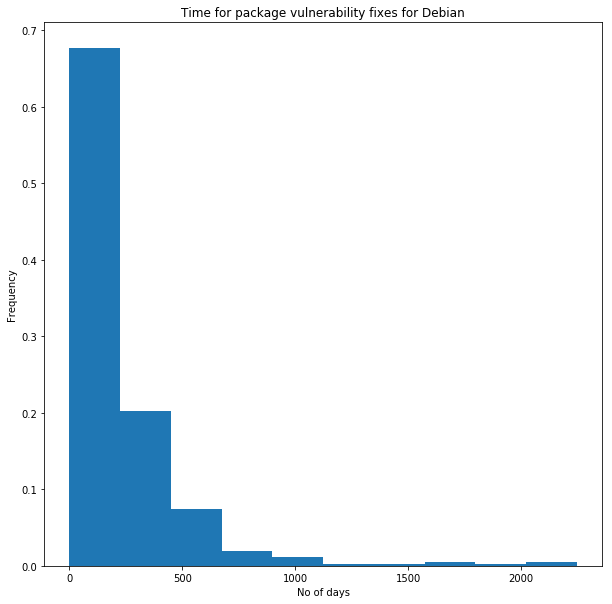

In [42]:
plt.figure(figsize=(10,10))
df = day_fixed_df['Days_For_Fix'][day_fixed_df['OS_base_name']=='debian']
ax = df.plot('hist',
             weights = np.ones_like(df.index) / len(df.index),
             title="Time for package vulnerability fixes for Debian")
ax.set(xlabel = 'No of days')

plt.savefig("outputs/Debian_Vulnerability_Fixes.png")

plt.show()

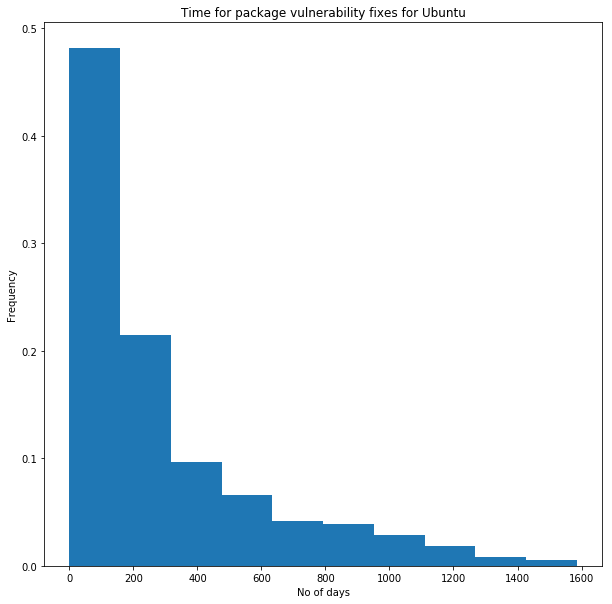

In [43]:
plt.figure(figsize=(10, 10))
df = day_fixed_df['Days_For_Fix'][day_fixed_df['OS_base_name'] == 'ubuntu']
ax = df.plot('hist',
             weights=np.ones_like(df.index) / len(df.index),
             title="Time for package vulnerability fixes for Ubuntu")
ax.set(xlabel='No of days')
plt.savefig("outputs/Ubuntu_Vulnerability_Fixes.png")

In [33]:
debian_info = data[data['OS_base_name']=='debian']
print("For Debian:")
print(len(debian_info[~debian_info['Date_Reported'].isnull()]), "vulnerabilities were reported")
print(len(debian_info[~debian_info['Date_Fixed'].isnull()]), "vulnerabilities were fixed")

For Debian:
1316 vulnerabilities were reported
422 vulnerabilities were fixed


120 vulnerabilities out of 686 reported vulnerabilities were fixed. Rest are still unifixed.

In [34]:
ubuntu_info = data[data['OS_base_name']=='ubuntu']
print("For Ubuntu:")
print(len(ubuntu_info[~ubuntu_info['Date_Reported'].isnull()]), "vulnerabilities were reported")
print(len(ubuntu_info[~ubuntu_info['Date_Fixed'].isnull()]), "vulnerabilities were fixed")

For Ubuntu:
1297 vulnerabilities were reported
385 vulnerabilities were fixed


__________